In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv("Placement_Data_Full_Class.csv")

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


In [3]:
df = df.drop(columns=['sl_no'])

In [4]:
df.describe()

,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


In [5]:
df.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [6]:
df.isnull().sum()

gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

<Axes: >

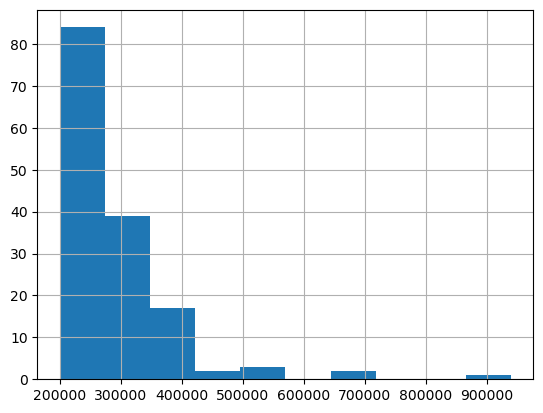

In [7]:
import matplotlib.pyplot as plt
df['salary'].hist()

In [8]:
df['salary'] = df['salary'].fillna(0)

<Axes: >

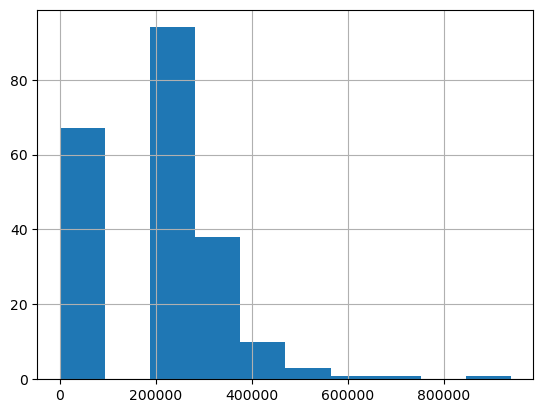

In [9]:
df['salary'].hist()

In [10]:
#Specialization wise average salary of placed students
df[df.status=='Placed'].groupby(['degree_t','specialisation']).salary.mean()

degree_t   specialisation
Comm&Mgmt  Mkt&Fin           290044.117647
           Mkt&HR            255794.117647
Others     Mkt&Fin           300000.000000
           Mkt&HR            267333.333333
Sci&Tech   Mkt&Fin           322720.000000
           Mkt&HR            301937.500000
Name: salary, dtype: float64

In [11]:
t=df.groupby('specialisation').status.value_counts(normalize=True)*100
print(f'Placement Stats Of Different Specialisations:\n{t}\n')

Placement Stats Of Different Specialisations:
specialisation  status    
Mkt&Fin         Placed        79.166667
                Not Placed    20.833333
Mkt&HR          Placed        55.789474
                Not Placed    44.210526
Name: proportion, dtype: float64



In [12]:
for col in df.select_dtypes(include=['object']).columns:
    print(f"{col}: {df[col].unique()}")

gender: ['M' 'F']
ssc_b: ['Others' 'Central']
hsc_b: ['Others' 'Central']
hsc_s: ['Commerce' 'Science' 'Arts']
degree_t: ['Sci&Tech' 'Comm&Mgmt' 'Others']
workex: ['No' 'Yes']
specialisation: ['Mkt&HR' 'Mkt&Fin']
status: ['Placed' 'Not Placed']


In [13]:
from sklearn import preprocessing
for col in df.select_dtypes(include=['object']).columns:
    label_encoder = preprocessing.LabelEncoder()
    label_encoder.fit(df[col].unique())
    df[col]=label_encoder.transform(df[col])
    print(f"{col}: {df[col].unique()}")

gender: [1 0]
ssc_b: [1 0]
hsc_b: [1 0]
hsc_s: [1 2 0]
degree_t: [2 0 1]
workex: [0 1]
specialisation: [1 0]
status: [1 0]


<Axes: >

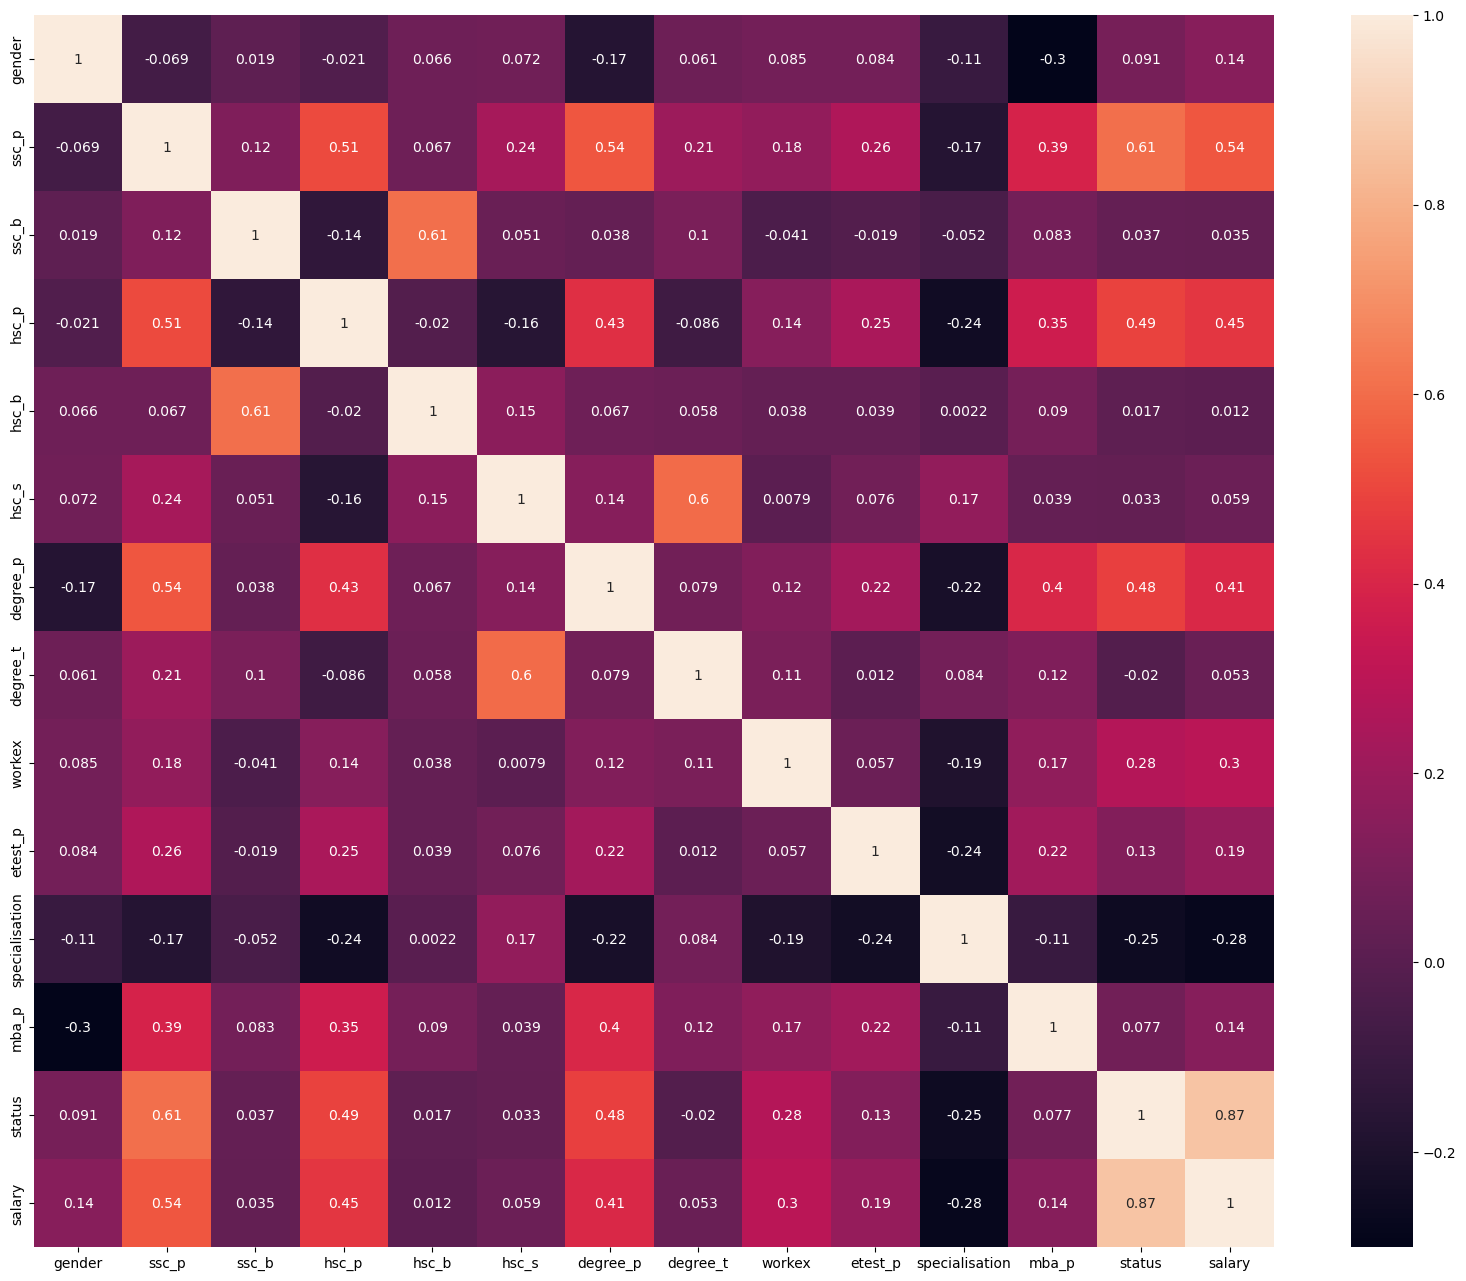

In [14]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 16))
sns.heatmap(df.corr(), fmt='.2g', annot=True)

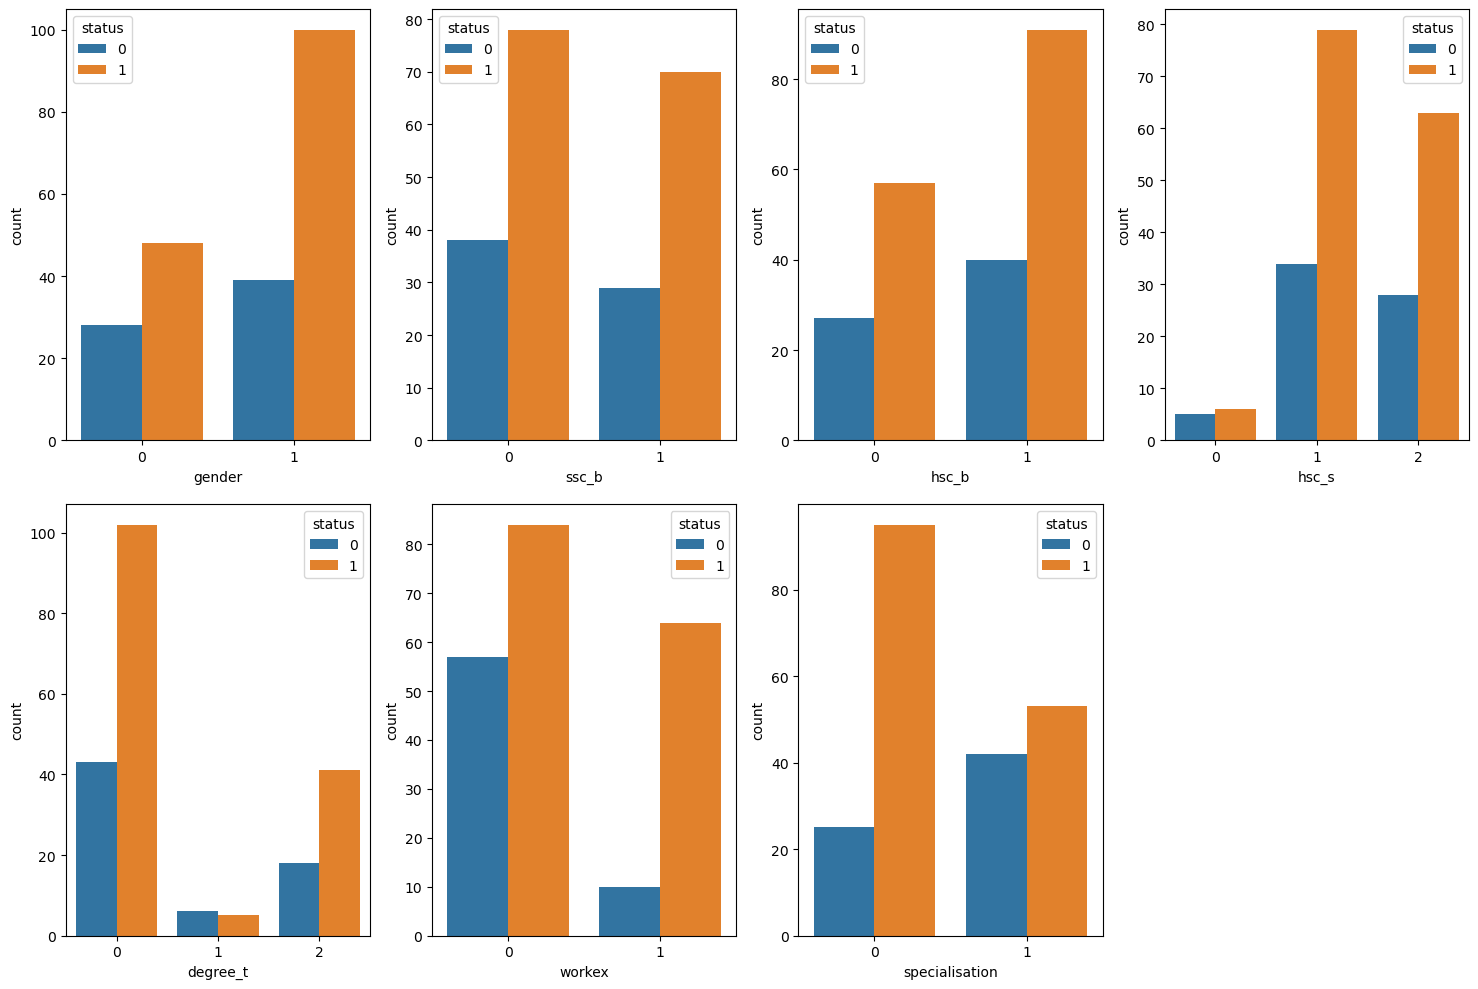

In [15]:
#EDA
# list of categorical variables to plot
cat_vars = ['gender', 'ssc_b', 'hsc_b', 'hsc_s',
            'degree_t', 'workex', 'specialisation']
# create figure with subplots
fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(15, 10))
axs = axs.flatten()

# create barplot for each categorical variable
for i, var in enumerate(cat_vars):
    sns.countplot(x=var, hue='status', data=df, ax=axs[i])
    #axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)

# adjust spacing between subplots
fig.tight_layout()

# remove the eighth subplot
fig.delaxes(axs[7])

# show plot
plt.show()

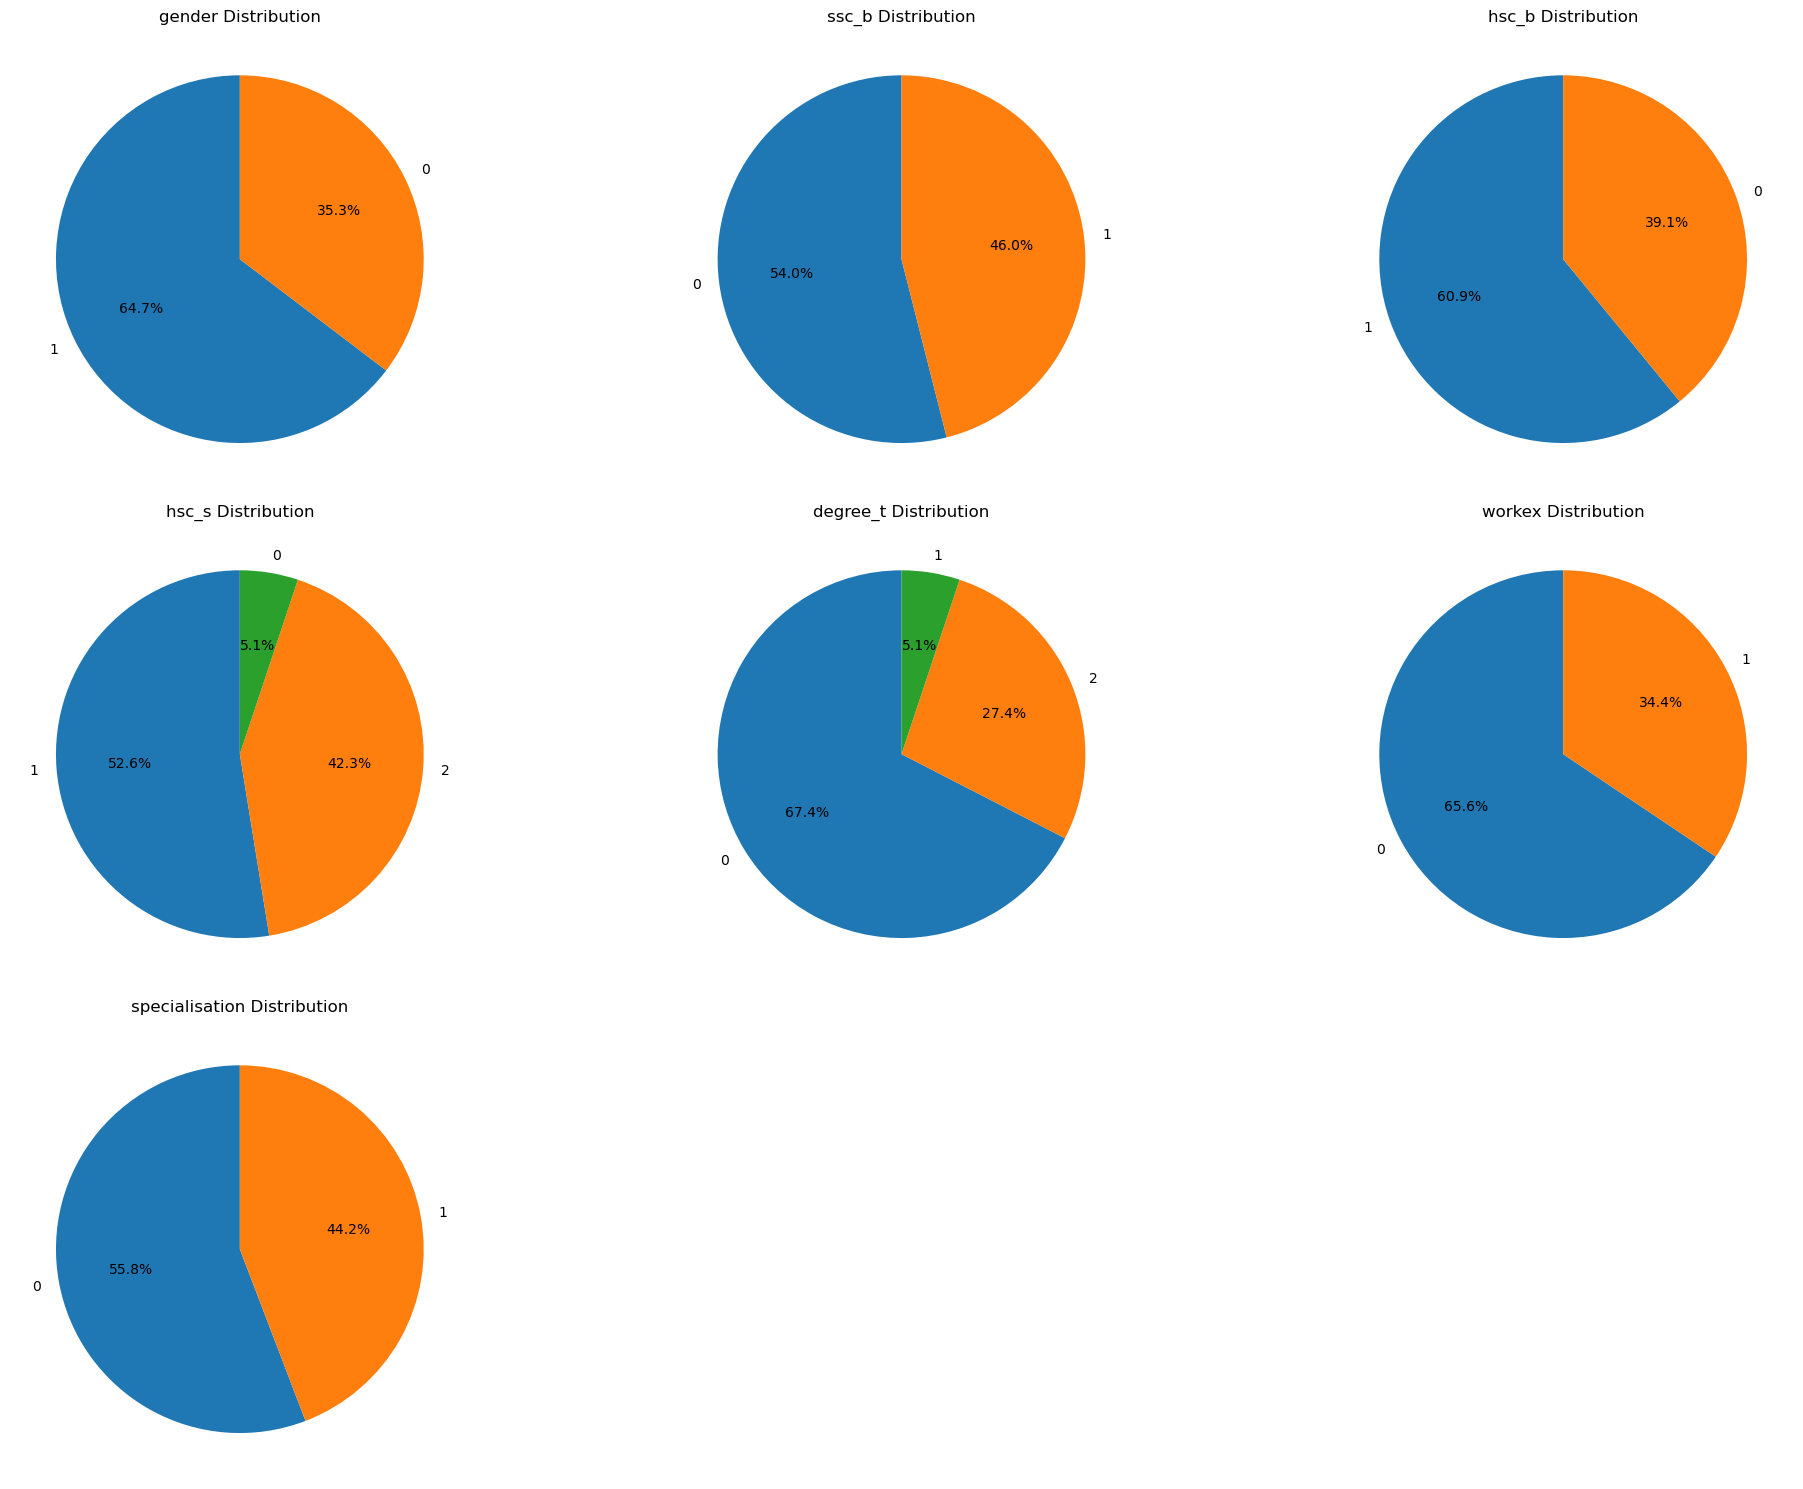

In [16]:
# create a figure and axes
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(20, 15))

# create a pie chart for each categorical variable
for i, var in enumerate(cat_vars):
    if i < len(axs.flat):
        # count the number of occurrences for each category
        cat_counts = df[var].value_counts()

        # create a pie chart
        axs.flat[i].pie(cat_counts, labels=cat_counts.index, autopct='%1.1f%%', startangle=90)

        # set a title for each subplot
        axs.flat[i].set_title(f'{var} Distribution')

# remove the eighth and ninth subplot
fig.delaxes(axs[2, 2])  # 2 represents the row index, and 2 represents the column index
fig.delaxes(axs[2, 1])  # 2 represents the row index, and 1 represents the column index

# adjust spacing between subplots
fig.tight_layout()

# show the plot
plt.show()


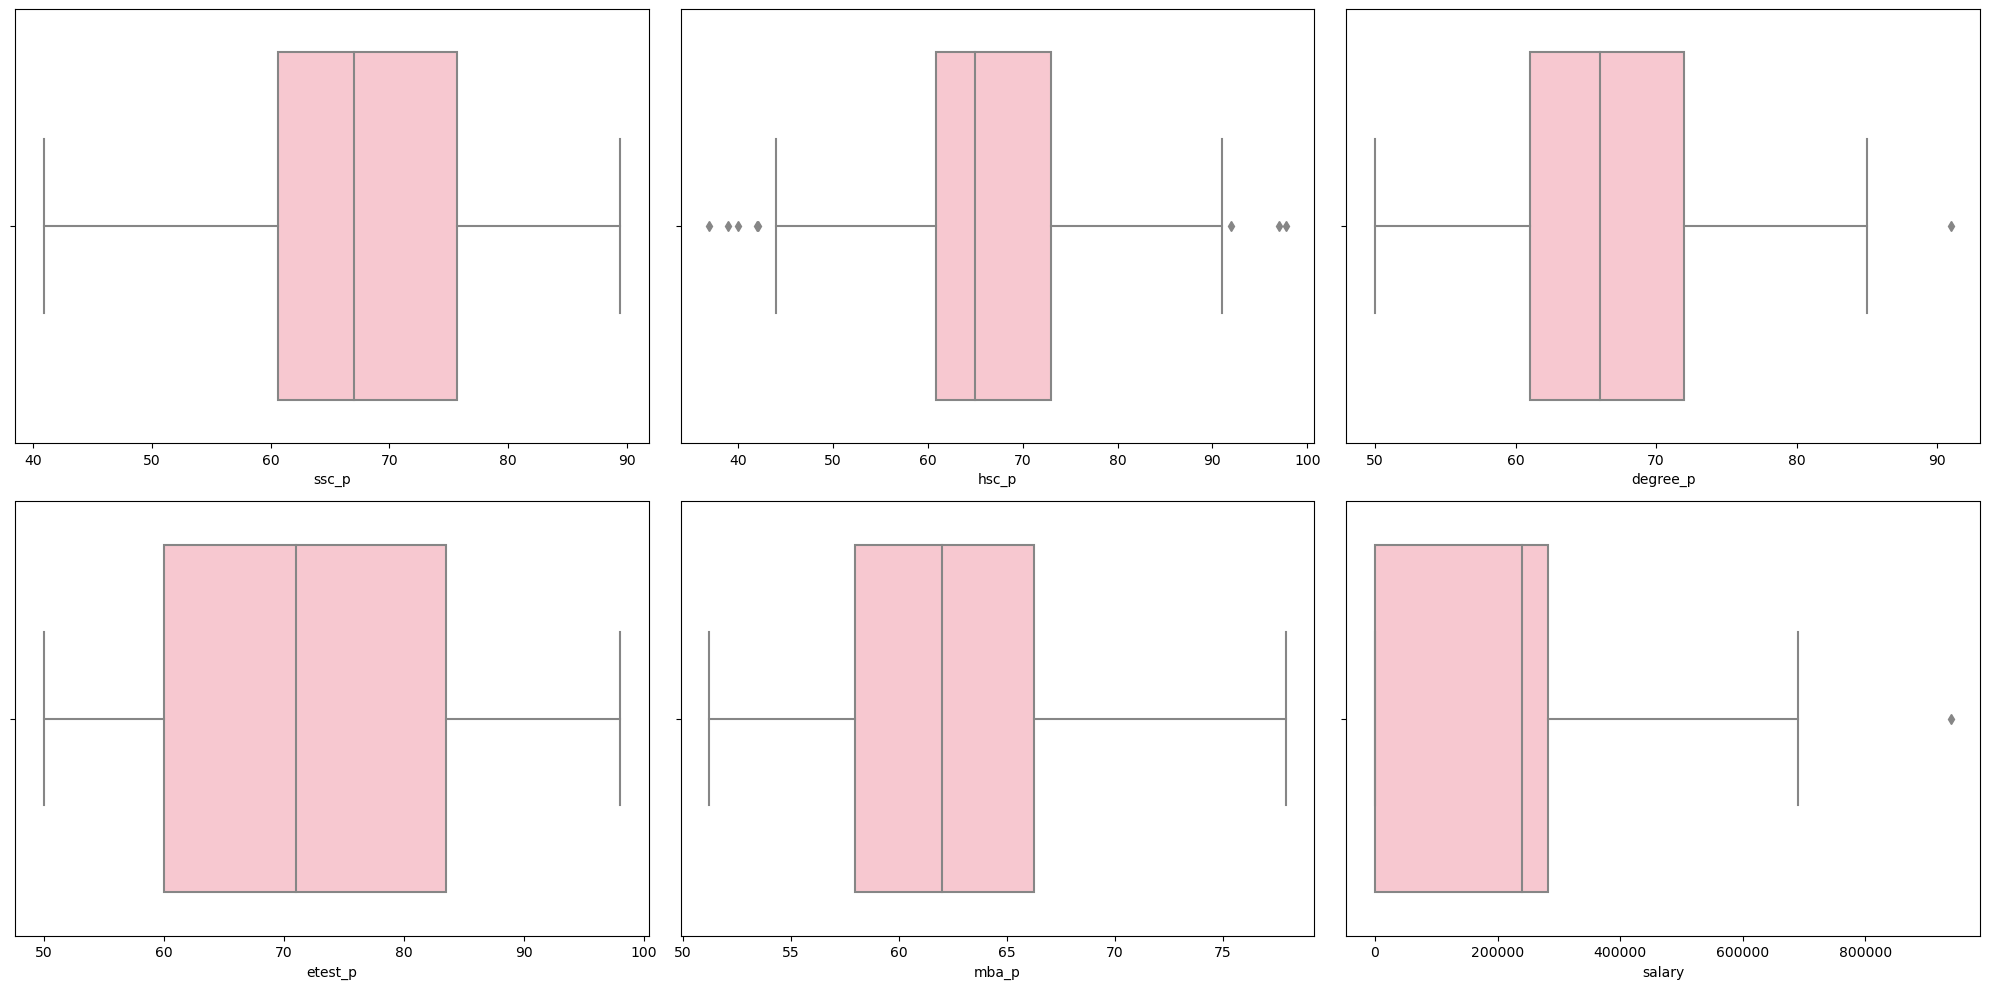

In [17]:
num_vars = ['ssc_p', 'hsc_p', 'degree_p', 'etest_p',
            'mba_p','salary']

fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(20, 10))
axs = axs.flatten()

for i, var in enumerate(num_vars):
    sns.boxplot(x=var, data=df, ax=axs[i],color='pink')

fig.tight_layout()

plt.show()

In [18]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('whitegrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

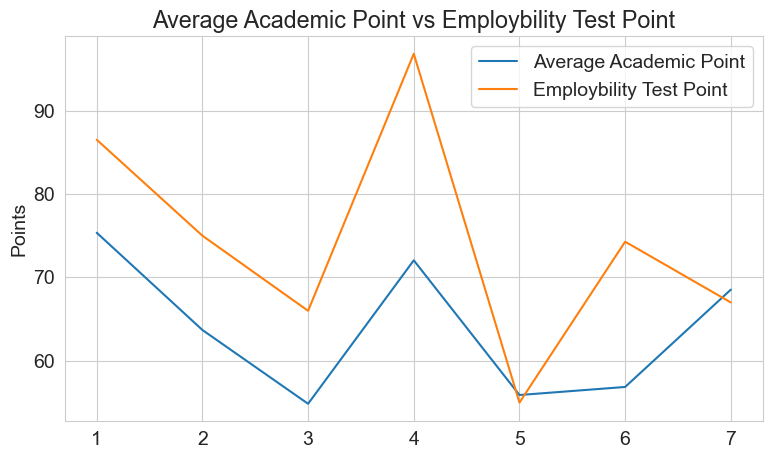

In [19]:
df['avg_p']=(df.ssc_p+df.hsc_p+df.degree_p+df.mba_p)/4
p=df[['avg_p','etest_p']]
plt.title("Average Academic Point vs Employbility Test Point")
plt.plot(p.avg_p.iloc[1:8],label='Average Academic Point')
plt.ylabel("Points")
plt.plot(p.etest_p.iloc[1:8],label='Employbility Test Point')
plt.legend()

Genderwise statistics of Academic Points:


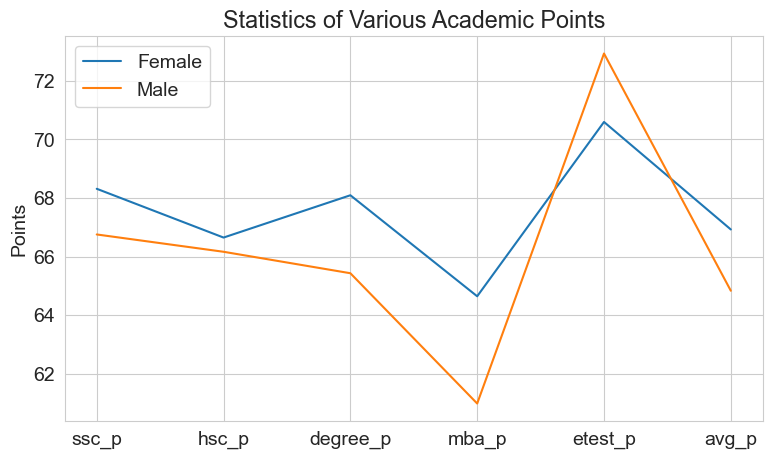

In [20]:
gdf=df.groupby('gender').mean()
print(f'Genderwise statistics of Academic Points:')
plt.title("Statistics of Various Academic Points")
plt.ylabel("Points")
plt.plot(gdf[['ssc_p','hsc_p','degree_p','mba_p','etest_p','avg_p']].iloc[0],label='Female')
plt.plot(gdf[['ssc_p','hsc_p','degree_p','mba_p','etest_p','avg_p']].iloc[1],label='Male')
plt.legend()

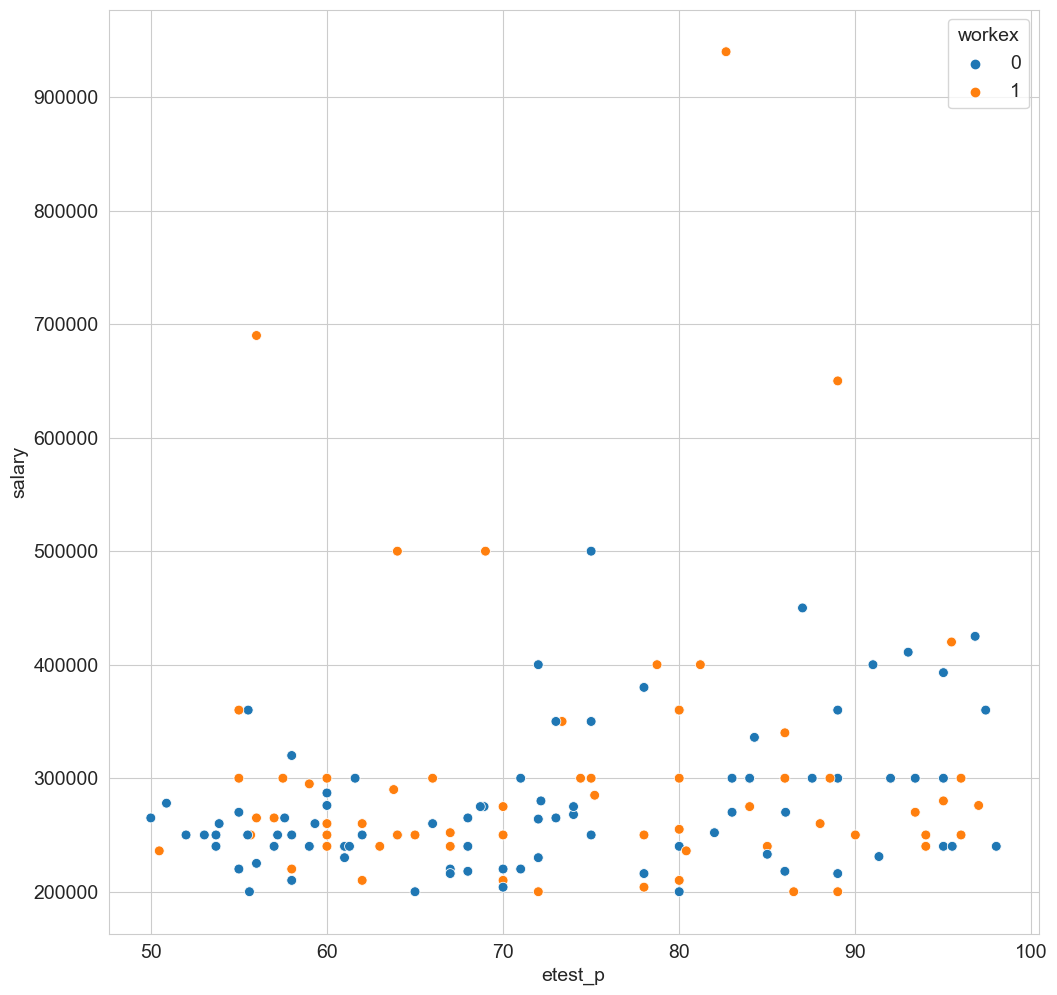

In [21]:
pp=df[df.status==1]
plt.figure(figsize=(12,12))
sns.set_style('whitegrid')
sns.scatterplot(x=pp.etest_p, # X-axis
                y=pp.salary,  # Y-axis
                hue=pp.workex,  # Dot color
                s=50);

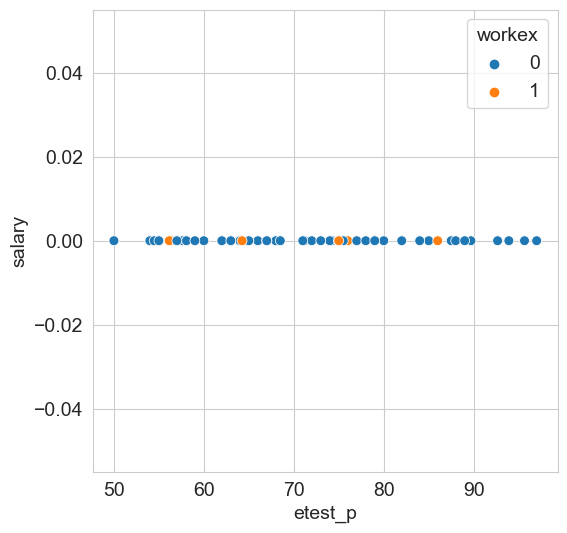

In [22]:
pp=df[df.status==0]
plt.figure(figsize=(6,6))
sns.set_style('whitegrid')
sns.scatterplot(x=pp.etest_p, # X-axis
                y=pp.salary,  # Y-axis
                hue=pp.workex,  # Dot color
                s=50);

In [23]:
data_input =df.drop(columns=['salary','avg_p'])
data_output =df['salary']

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(data_input,data_output, test_size=0.3,random_state=0)

In [25]:
from sklearn.linear_model import LinearRegression
Regressor = LinearRegression()
Regressor.fit(X_train,Y_train)

LinearRegression()

In [26]:
Y_pred = Regressor.predict(X_test)
Y_pred

array([ 1.55348667e+04,  2.41406845e+05,  2.79261275e+05, -4.08996485e+03,
        3.06811355e+05, -4.90697666e+04,  2.90035498e+05,  2.54024965e+05,
        2.83205848e+03,  3.54782266e+05,  2.52468800e+05,  2.63458956e+05,
        3.41151675e+05,  2.57410148e+05,  3.35157211e+05,  2.90443703e+05,
        3.18758890e+05, -2.19110813e+04,  3.91548270e+05,  9.36097376e+03,
       -2.14284056e+02, -2.44214817e+04,  2.88930722e+05, -1.46965335e+04,
       -1.15708095e+04, -3.25687616e+04,  2.67611968e+05,  3.21519677e+05,
        2.88639657e+05,  3.17448352e+05,  3.25301929e+05, -2.88965982e+04,
        2.84877538e+05,  1.39141624e+04,  6.34111745e+03,  3.08924248e+05,
        3.09627503e+05,  3.21574244e+05,  2.76656267e+05,  2.99370631e+05,
        5.43392257e+04, -2.16959048e+04,  2.88490158e+05,  3.23585803e+05,
        2.38209587e+05,  3.37933989e+05,  2.77709484e+05,  2.74313048e+05,
       -4.23848405e+04,  2.78528347e+05,  2.62745535e+05,  3.08299950e+05,
        2.24655233e+05,  

In [27]:
from sklearn.metrics import r2_score
score = r2_score(Y_test,Y_pred)
score

0.792246641549269

In [52]:
#input check
p =[[0,94,0,94,1,2,84,2,0,70,0,55,1]]
result = Regressor.predict(p)
result

C:\Users\Devasvi Zode\anaconda\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([214498.81370748])

In [29]:
#Logistic Regression for Placement prediction
d_input =df.drop(columns=['status','avg_p'])
d_output =df['status']

In [30]:
x_train, x_test, y_train, y_test = train_test_split(d_input,d_output, test_size=0.25,random_state=0)

In [31]:
from sklearn.linear_model import LogisticRegression
model =LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [32]:
model.score(x_test,y_test)

1.0

In [51]:
#input check 
p=[[0,53,0,60,1,2,60,2,0,56,0,53,900000]]
result = model.predict(p)
result

C:\Users\Devasvi Zode\anaconda\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1])

In [34]:
y_pred = model.predict(x_test)
y_pred

array([0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1])

In [35]:
from sklearn.metrics import r2_score
score = r2_score(y_test,y_pred)
score

1.0

In [36]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn import metrics
import numpy as np 

mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

print('Mean Absolute Error:', mae)
print('Mean Square Error:', mse)
print('Root Mean Square Error:', r2)

Mean Absolute Error: 0.0
Mean Square Error: 0.0
Root Mean Square Error: 0.0


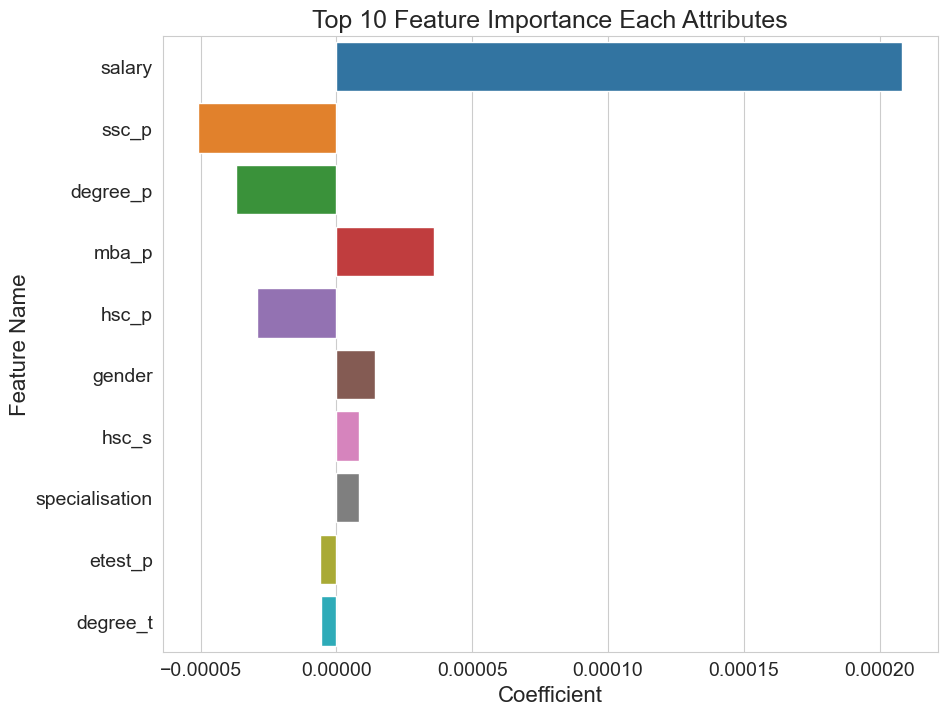

In [37]:
coefficients = model.coef_[0]

# Get the odds ratios
odds_ratios = np.exp(coefficients)

# Get the feature names
feature_names = x_train.columns

# Create a DataFrame to store coefficients and odds ratios
fi = pd.DataFrame({'Feature Name': feature_names, 'Coefficient': coefficients, 'Odds Ratio': odds_ratios})

# Sort DataFrame by absolute value of coefficients or odds ratios for feature importance
fi['Absolute Coefficient'] = fi['Coefficient'].abs()
fi = fi.sort_values(by='Absolute Coefficient', ascending=False)

fi2 = fi.head(10)
plt.figure(figsize=(10,8))
sns.barplot(data=fi2, x='Coefficient', y='Feature Name')
plt.title('Top 10 Feature Importance Each Attributes', fontsize=18)
plt.xlabel ('Coefficient', fontsize=16)
plt.ylabel ('Feature Name', fontsize=16)
plt.show()

In [38]:
CM = metrics.confusion_matrix(y_test,y_pred)
CM

array([[17,  0],
       [ 0, 37]], dtype=int64)

Text(0.5, 3.722222222222209, 'Predicted labels')

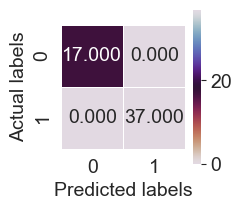

In [39]:
plt.figure(figsize = (2,2))
sns.heatmap(CM,annot=True,fmt = '0.3f', linewidth = 0.5,square = True,cmap = "twilight_r")
plt.ylabel('Actual labels')
plt.xlabel('Predicted labels')

In [40]:
from sklearn.metrics import classification_report
target_names = ('no placement','placement')
print(classification_report(y_test,y_pred,target_names=target_names))

              precision    recall  f1-score   support

no placement       1.00      1.00      1.00        17
   placement       1.00      1.00      1.00        37

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54



In [41]:
# from sklearn.tree import DecisionTreeClassifier
# RTmodel = DecisionTreeClassifier()
# RTmodel.fit(X_train, Y_train)
# predictions = RTmodel.predict(X_test)
# predictions

array([     0., 240000., 300000.,      0., 200000.,      0., 200000.,
       210000.,      0., 300000., 230000., 300000., 350000., 260000.,
       275000., 260000., 240000.,      0., 270000.,      0.,      0.,
            0., 265000.,      0.,      0.,      0., 240000., 216000.,
       250000., 450000., 200000.,      0., 450000.,      0.,      0.,
       200000., 240000., 204000., 650000., 500000.,      0.,      0.,
       260000., 278000., 250000., 940000., 250000., 250000.,      0.,
       250000., 270000., 270000., 240000., 210000., 240000.,      0.,
       275000., 300000., 240000.,      0., 270000., 218000., 240000.,
       300000., 200000.])

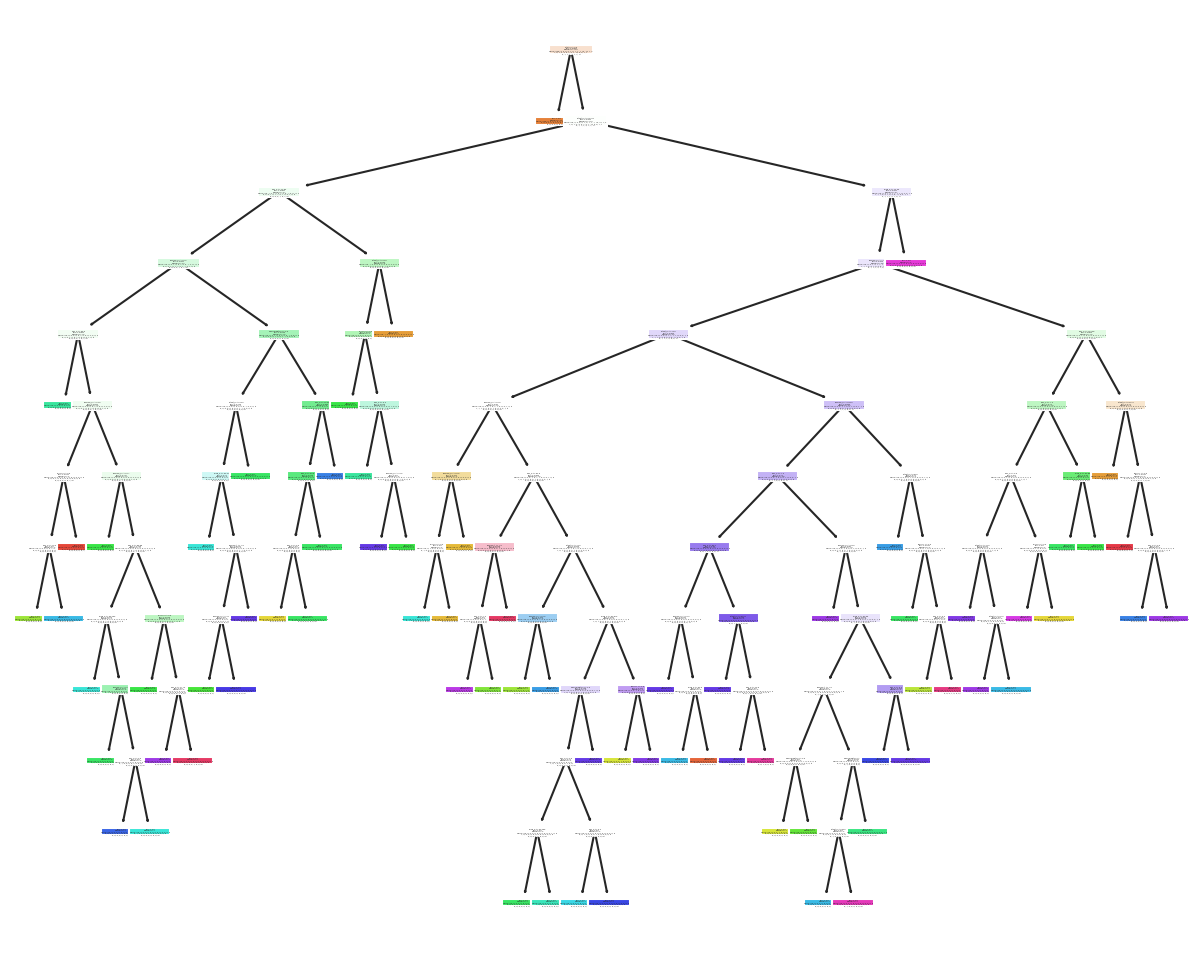

In [45]:
# import matplotlib.pyplot as plt
# from sklearn.tree import plot_tree
# plt.figure(figsize=(10,8), dpi=150)
# plot_tree(RTmodel,feature_names=data_input.columns.tolist(), filled=True);

Accuracy: -13269907691.307692
